# MNIST Classification Model Comparison

1. Data Preparation
2. Model Training
3. Model Evaluation
4. Error Analysis
5. Output & Visualization
6. Technical Details
Use scikit-learn for logistic regression, SVM, decision tree, and random forest.
Use xgboost library for the XGBoost classifier.
Use sklearn.metrics.classification_report for model evaluation.
Use matplotlib.pyplot or seaborn for visualization.
Use a random_state for reproducibility.

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load & preprocess dataset

# Fetch MNIST (70,000 handwritten digit images, 28x28 pixels)
X_data, y_data = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Normalize pixel values (0-255 → 0-1 range)
X_data = X_data / 255.0
y_data = y_data.astype(int)   # Convert labels to integers

# Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

In [6]:
# Define candidate models
classifiers = {
    "LogReg": LogisticRegression(max_iter=1200, random_state=1),  # Higher iterations
    "SVM (RBF)": SVC(kernel="rbf", C=1.0, random_state=1),       # Added C param
    "DecisionTree": DecisionTreeClassifier(max_depth=None, random_state=1),
    "RandomForest": RandomForestClassifier(n_estimators=120, random_state=1),  # Slightly different
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=1),
}

In [7]:
# Train, evaluate & collect results
# ---------------------------
results_summary = {}
wrong_predictions = {}

for clf_name, clf in classifiers.items():
    print(f"Fitting {clf_name} ...")
    start = time.time()
    
    # Train
    clf.fit(X_train, y_train)
    duration = round(time.time() - start, 2)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    rep = classification_report(y_test, y_pred, output_dict=True)
    cmatrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results_summary[clf_name] = {
        "accuracy": acc,
        "report": rep,
        "confusion": cmatrix,
        "train_time": duration
    }
    
    # Save misclassified examples (only first 5)
    mis_idx = np.where(y_pred != y_test)[0][:5]
    wrong_predictions[clf_name] = {
        "img": X_test[mis_idx],
        "true": y_test[mis_idx],
        "pred": y_pred[mis_idx]
    }
    
    # Display report
    print(classification_report(y_test, y_pred))


Fitting LogReg ...
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2058
           1       0.95      0.97      0.96      2364
           2       0.91      0.90      0.91      2133
           3       0.90      0.89      0.90      2176
           4       0.92      0.93      0.93      1936
           5       0.89      0.88      0.89      1915
           6       0.94      0.95      0.95      2088
           7       0.93      0.94      0.94      2248
           8       0.89      0.86      0.88      1992
           9       0.90      0.90      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000

Fitting SVM (RBF) ...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98    

C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:09:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.98      0.96      0.97      2176
           4       0.97      0.98      0.98      1936
           5       0.98      0.97      0.98      1915
           6       0.98      0.99      0.98      2088
           7       0.97      0.98      0.97      2248
           8       0.97      0.97      0.97      1992
           9       0.96      0.97      0.96      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



In [13]:
# Results summary dataframe
perf_df = pd.DataFrame({
    model: {
        "Accuracy": round(results_summary[model]["accuracy"], 4),
        "Train Time (s)": results_summary[model]["train_time"]
    }
    for model in results_summary
}).T

print("\n--- Model Comparison ---")
print(perf_df)


--- Model Comparison ---
              Accuracy  Train Time (s)
LogReg          0.9205           11.17
SVM (RBF)       0.9763          109.59
DecisionTree    0.8660           13.34
RandomForest    0.9667           31.39
XGBoost         0.9762          134.58


C:\Users\bbuser\AppData\Local\Temp\ipykernel_26152\378550521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perf_df.reset_index(), x="index", y="Accuracy", palette="viridis")


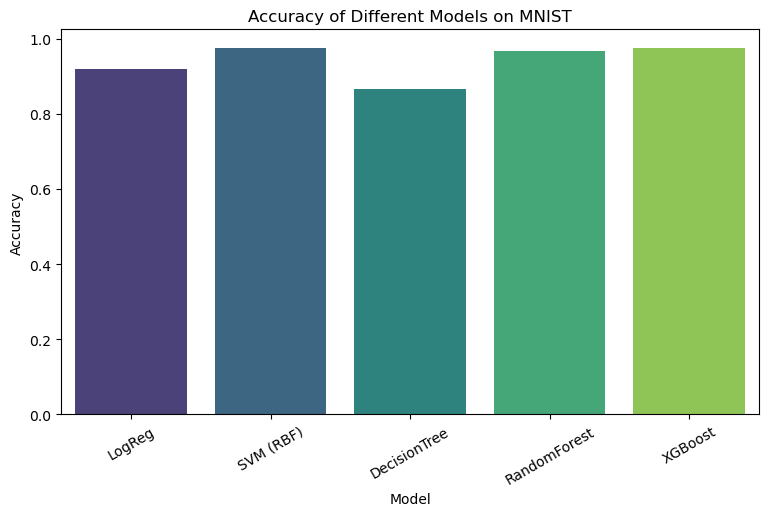

In [14]:
# Accuracy comparison bar chart

plt.figure(figsize=(9, 5))
sns.barplot(data=perf_df.reset_index(), x="index", y="Accuracy", palette="viridis")
plt.title("Accuracy of Different Models on MNIST")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

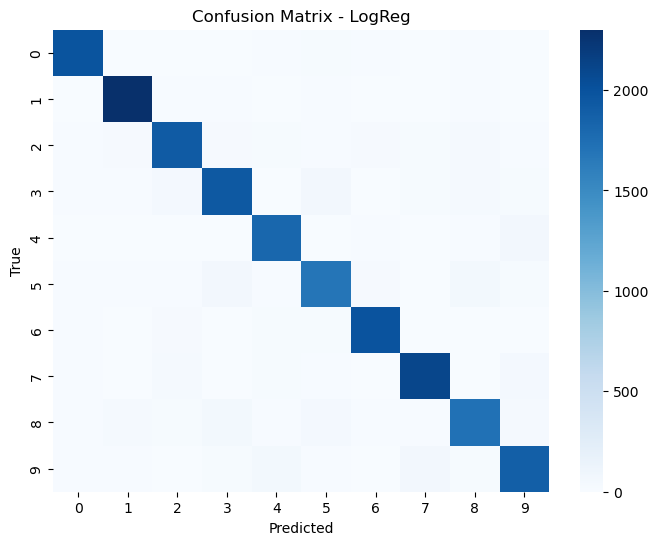

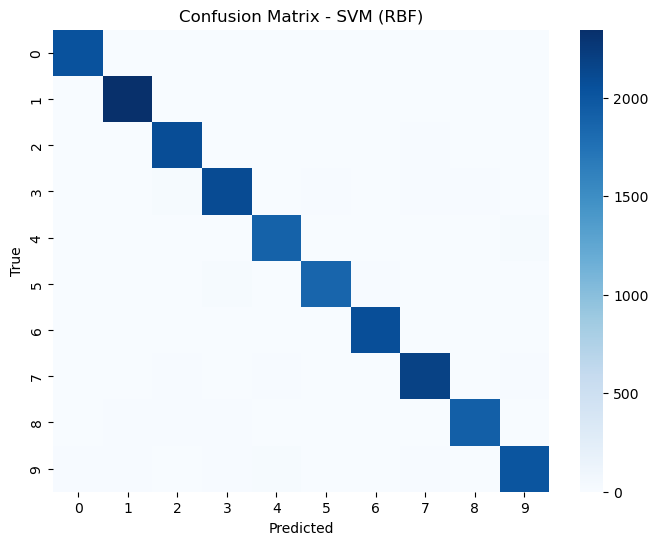

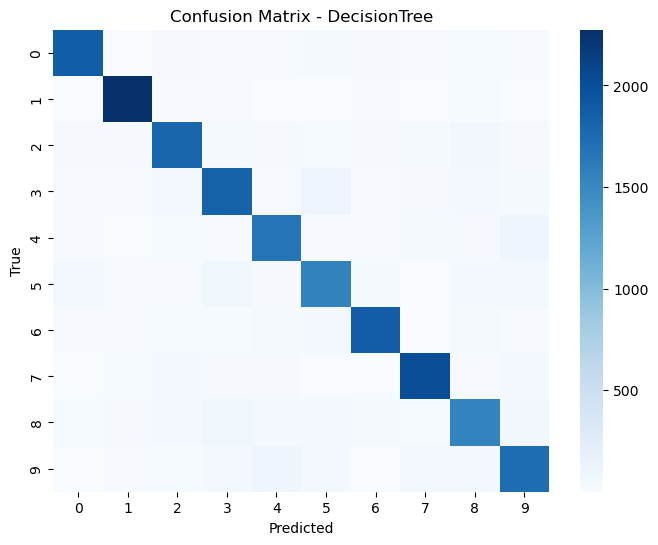

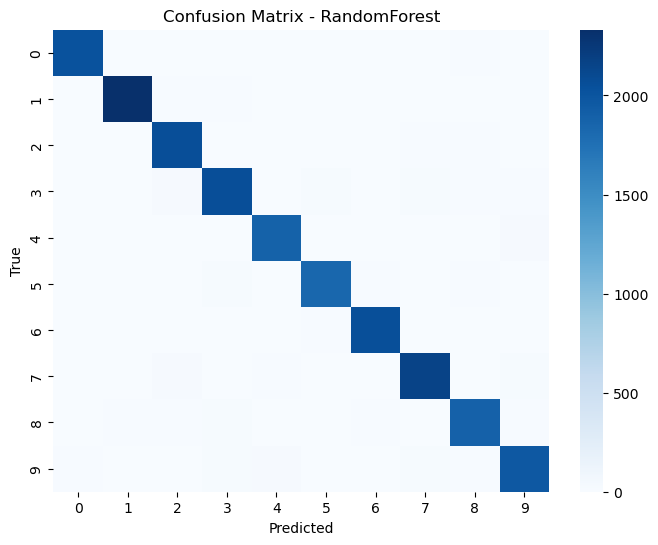

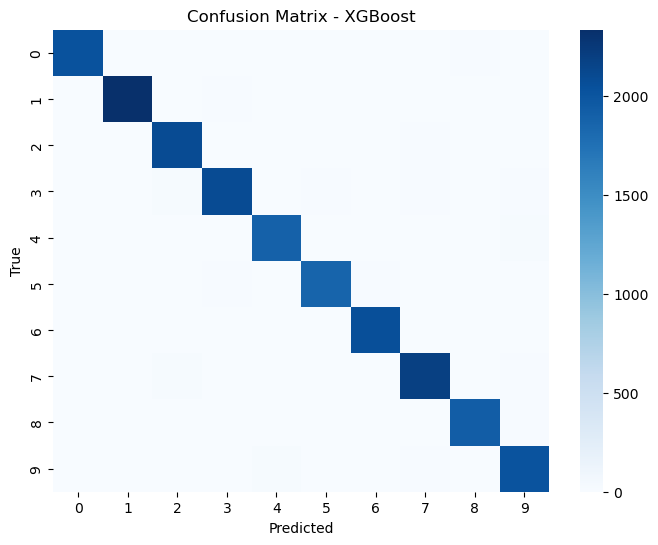

In [20]:
for model_name, data in results_summary.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(data["confusion"], cmap="Blues", annot=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

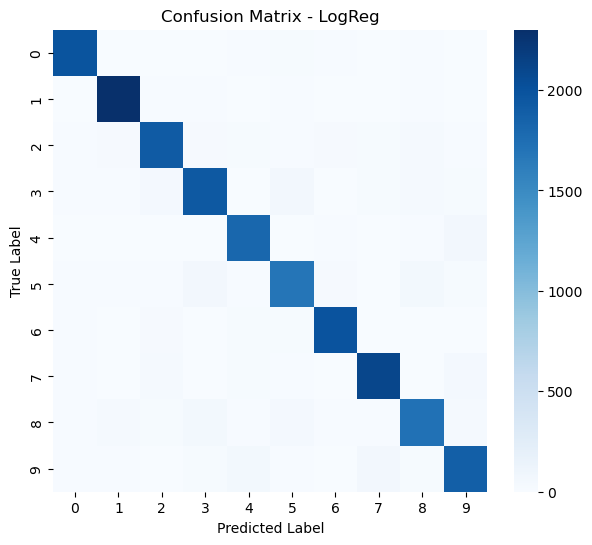

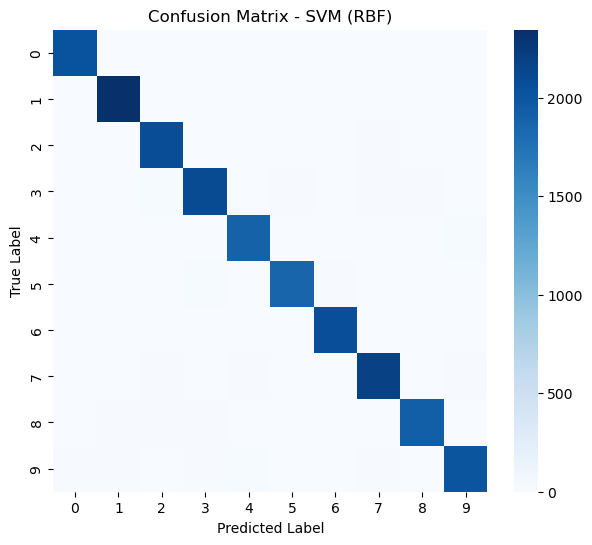

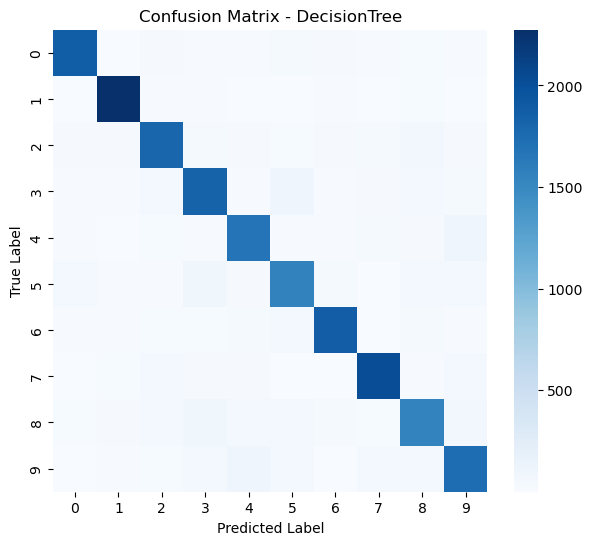

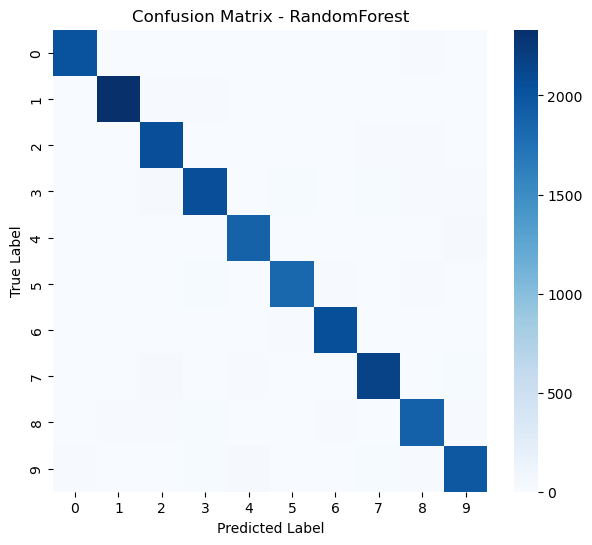

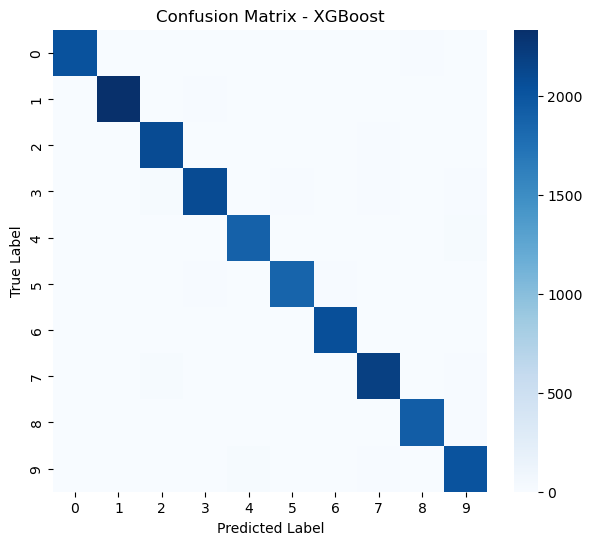

In [21]:
# Confusion matrices
for model, info in results_summary.items():
    plt.figure(figsize=(7, 6))
    sns.heatmap(info["confusion"], cmap="Blues", annot=False, cbar=True)
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

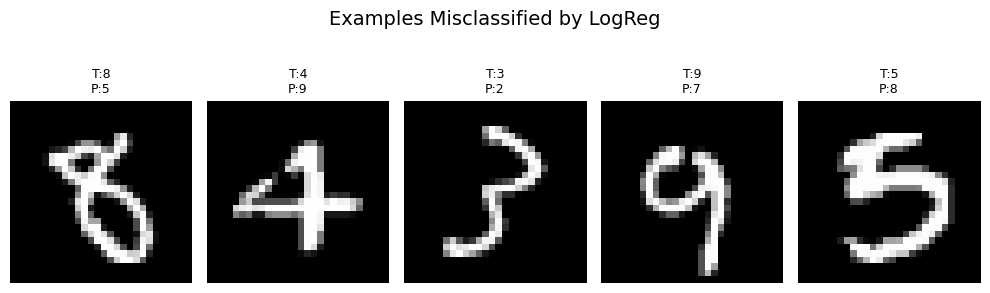

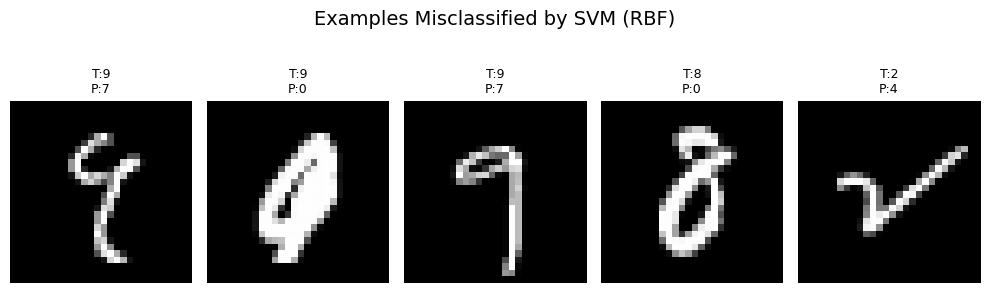

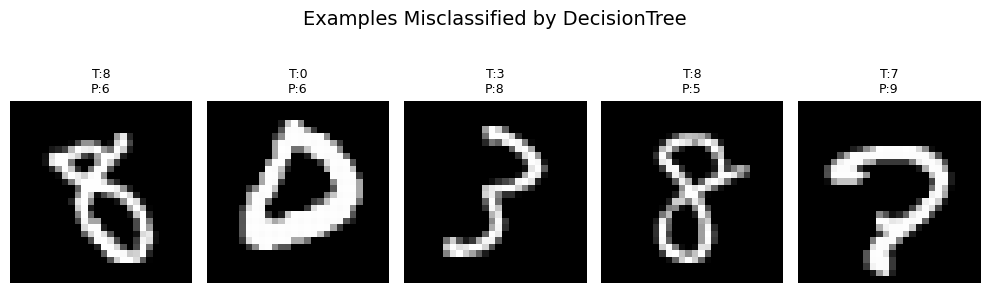

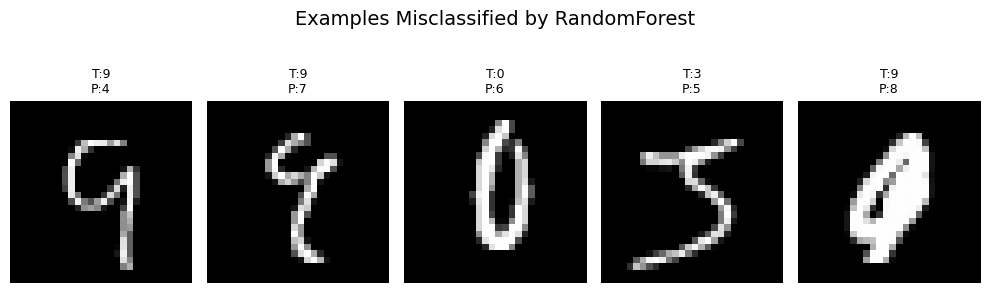

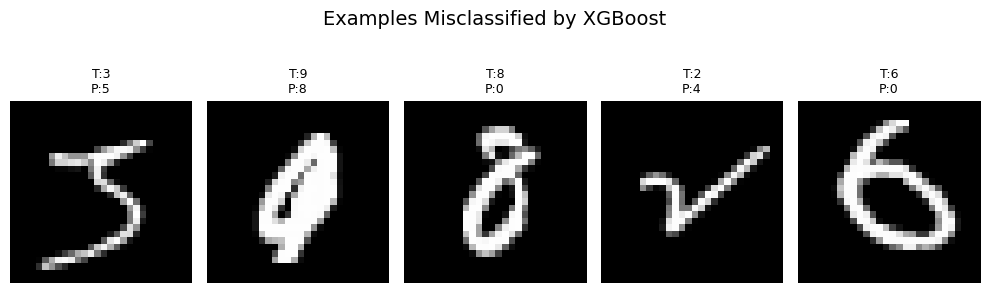

In [22]:
# Display sample misclassified images
for model, mis in wrong_predictions.items():
    reshaped_imgs = mis["img"].reshape(-1, 28, 28)
    t_labels, p_labels = mis["true"], mis["pred"]
    
    plt.figure(figsize=(10, 3))
    plt.suptitle(f"Examples Misclassified by {model}", fontsize=14, y=1.05)
    
    for i in range(len(reshaped_imgs)):
        plt.subplot(1, 5, i+1)
        plt.imshow(reshaped_imgs[i], cmap="gray")
        plt.title(f"T:{t_labels[i]}\nP:{p_labels[i]}", fontsize=9)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

### Why errors occur:
* Poor Image Quality → Blurred, pixelated, or faint digits make it difficult for models to pick up reliable features.
* Ambiguous Handwriting → Some digits (e.g., a sloppy “5” vs “6”) are written in ways that overlap between classes.
* Incomplete Strokes → Missing or broken lines can turn a “9” into something closer to a “7” or “4.”
* Similar Shapes → Certain digits naturally resemble each other (e.g., 1 & 7, 3 & 8, 4 & 9).

### Model-specific limitations:
* Logistic Regression → Good for linear boundaries, but weak for capturing non-linear pixel relationships.
* SVM → Strong on separating classes but can be sensitive to noisy or borderline samples.Decision Trees → May overfit to pixel-level details and
* fail to generalize across handwriting styles.
* Random Forest & XGBoost → More robust by combining multiple learners, but still struggle with intrinsically ambiguous digits.